In [1]:
###General Code First Box
import pandas as pd
import numpy as np
import scanpy as sc
import magpy as mp
import scipy
import scipy.stats as stats
import anndata as ad
import diffxpy.api as de
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

def sort_list_by_pctexp(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    pctexp = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        pctexp[i] = (subset2.layers['raw_normalized']>0).sum(axis=0).A1 / subset.shape[0]
    subset.var['pctmax'] = pctexp.max(axis=0)
    sorted_list = subset.var['pctmax'].sort_values(ascending=False).index.tolist()
    return sorted_list
def sort_list_by_mean(adata, gene_list, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = np.zeros((len(clusters),subset.shape[1]))
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[i] = subset2.layers['raw_normalized'].mean(axis=0).A1
    subset.var['cmeans'] = cmeans.max(axis=0)
    sorted_list = subset.var['cmeans'].sort_values(ascending=False).index.tolist()
    return sorted_list
def means_to_df(adata, gene_list, save=None, groupby='lineage'):
    subset = adata[:,gene_list]
    clusters = subset.obs[groupby].unique()
    cmeans = {}
    for i,cluster in enumerate(clusters):
        subset2 = subset[subset.obs[groupby]==cluster]
        cmeans[cluster] = subset2.layers['raw_normalized'].mean(axis=0).A1
    df = pd.DataFrame(cmeans,index=gene_list)
    if save: df.to_csv(save)
    return df

combined_path = "/proj/magness/CDS010-014-015_combined/"

# sc.set_figure_params(dpi_save = 300, format = 'svg')
fig_path = combined_path+'fig4-ISC-TA-panels/'
sc.settings.figdir = fig_path

contrast_palette = ['#00ff7f','#b22222','#b8b8b8','#f0e68c','#705000','#00bfff','#dda0dd','#00ffff','#ccccff',
                    '#ff0000','#808000','#3cb371','#a97a67','#ff8c00','#ffd700','#02026e','#adff2f','#4169e1',
                    '#ffa07a','#2f4f4f','#7f007f','#6e6e6e','#ff00ff']

plt.rcParams ['figure.facecolor'] = 'white'

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



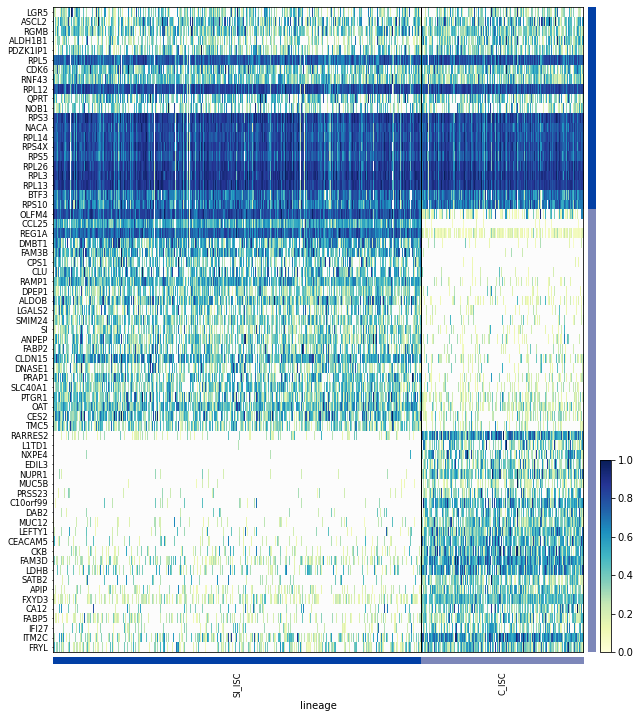

In [2]:
###Figure 4A
### ISC marker genes Heatmap
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

Gene_dict = {
    'ISC':['LGR5','ASCL2','RGMB','ALDH1B1',	'PDZK1IP1',	'RPL5',	'CDK6',	'RNF43',	'RPL12',	'QPRT',	'NOB1',	'RPS3',	'NACA',	'RPL14',	'RPS4X',	'RPS5',	'RPL26',	'RPL3',	'RPL13',	'BTF3',	'RPS10',
],
    'SI_ISC':['OLFM4','CCL25',	'REG1A',	'DMBT1',	'FAM3B',	'CPS1',	'CLU',	'RAMP1',	'DPEP1',	'ALDOB',	'LGALS2',	'SMIM24',	'SI',	'ANPEP',	'FABP2',	'CLDN15',	'DNASE1',	'PRAP1',	'SLC40A1',	'PTGR1',	'OAT',	'CES2',	'TMC5',
],
    'C_ISC':['RARRES2','L1TD1',	'NXPE4',	'EDIL3',	'NUPR1',	'MUC5B',	'PRSS23',	'C10orf99',	'DAB2',	'MUC12',	'LEFTY1',	'CEACAM5',	'CKB',	'FAM3D',	'LDHB',	'SATB2',	'APIP',	'FXYD3',	'CA12',	'FABP5',	'IFI27',	'ITM2C',	'FRYL',
]}
adata = mp.scale_adata(adata, groupby = 'lineage')

subset = adata[adata.obs['lineage'].isin(['SI_ISC','C_ISC'])]
sc.pl.heatmap(subset, Gene_dict, groupby = 'lineage', swap_axes = True, show_gene_labels = True, cmap=mp.blues, standard_scale='var')



Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

The following genes were filtered out:
[]



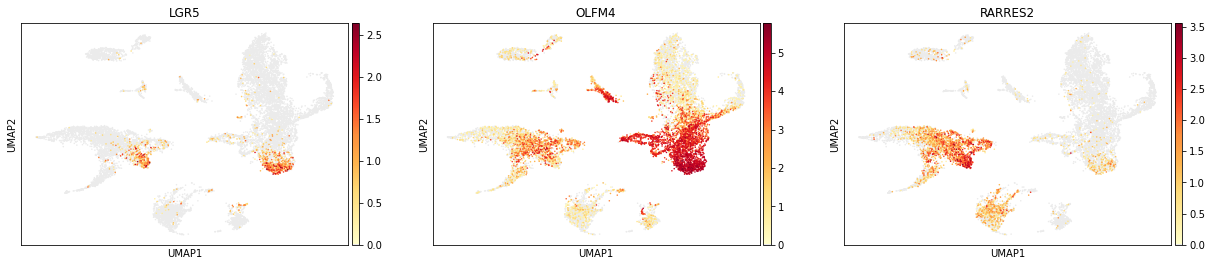

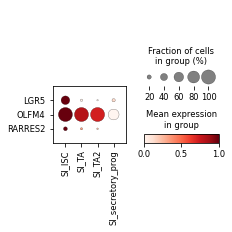

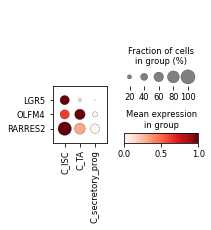

In [3]:
###Figure 4B
###OLFM4,RARRES2 Heatmaps
adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

Gene_list = mp.filter_genes(adata, [
'LGR5','OLFM4','RARRES2'
])

sc.pl.umap(adata, color=Gene_list, ncols =3, cmap=mp.reds)

###Figure 4C

SI_subset = adata[adata.obs['lineage'].isin(['SI_ISC','SI_TA','SI_TA2','SI_secretory_prog'])]
C_subset = adata[adata.obs['lineage'].isin(['C_ISC','C_TA','C_secretory_prog'])]

sc.pl.dotplot(SI_subset, Gene_list, groupby = 'lineage', swap_axes = True, standard_scale = 'var')
sc.pl.dotplot(C_subset, Gene_list, groupby = 'lineage', swap_axes = True, standard_scale = 'var')

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



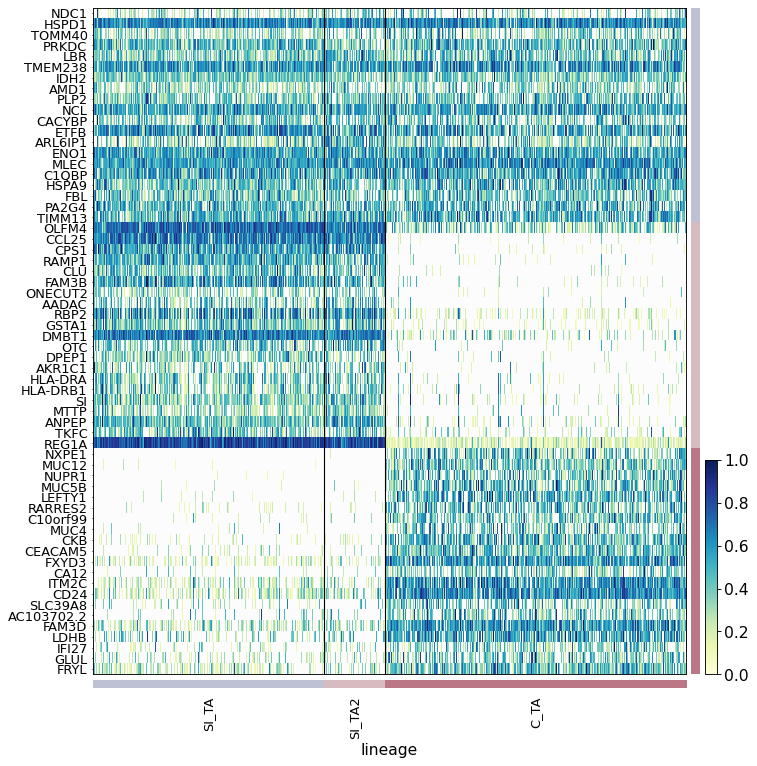

In [4]:
### Figure 4E
###TA Marker Genes Heatmap

adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

Gene_dict = {
    'TA':['NDC1',	'HSPD1',	'TOMM40',	'PRKDC',	'LBR',	'TMEM238',	'IDH2',	'AMD1',	'PLP2',	'NCL',	'CACYBP',	'ETFB',	'ARL6IP1',	'ENO1',	'MLEC',	'C1QBP',	'HSPA9',	'FBL',	'PA2G4',	'TIMM13',
],
    'SI_TA':['OLFM4','CCL25',	'CPS1',	'RAMP1',	'CLU',	'FAM3B',	'ONECUT2',	'AADAC',	'RBP2',	'GSTA1',	'DMBT1',	'OTC',	'DPEP1',	'AKR1C1',	'HLA-DRA',	'HLA-DRB1',	'SI',	'MTTP',	'ANPEP',	'TKFC',	'REG1A'
],
    'C_TA':['NXPE1',	'MUC12',	'NUPR1',	'MUC5B',	'LEFTY1',	'RARRES2',	'C10orf99',	'MUC4',	'CKB',	'CEACAM5',	'FXYD3',	'CA12',	'ITM2C',	'CD24',	'SLC39A8',	'AC103702.2',	'FAM3D',	'LDHB',	'IFI27',	'GLUL',	'FRYL',
]
}
sc.set_figure_params(dpi_save = 300, format = 'svg')

subset = adata[adata.obs['lineage'].isin(['SI_TA','SI_TA2','C_TA'])]
sc.pl.heatmap(subset, Gene_dict, groupby = 'lineage', swap_axes = True, show_gene_labels = True, standard_scale='var',cmap=mp.blues)#,save = 'TA_heatmap')



Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



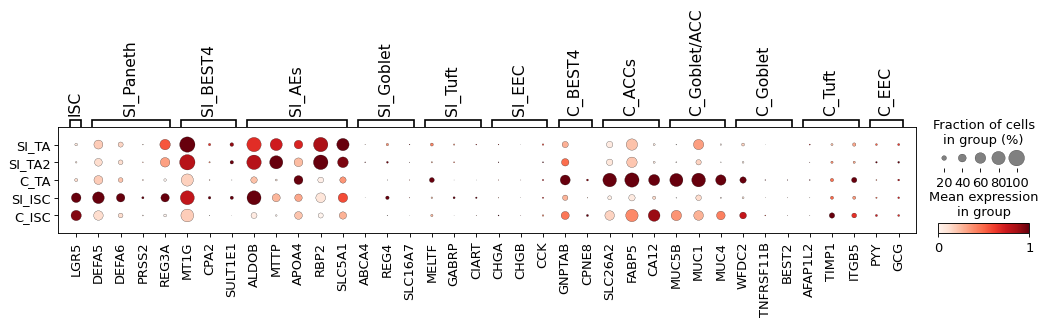

In [5]:
###Figure 4F
####organ-specific lineage markers in ISCs + TAs 

adata = mp.load(combined_path, "clustered_annotated_adata_k25_lr0.92_v1.5.h5ad")

adata.obs.lineage = adata.obs.lineage.cat.reorder_categories(['SI_TA','SI_TA2','C_TA','SI_ISC','C_ISC','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2','SI_paneth', 'SI_tuft','SI_secretory_prog','SI_goblet','SI_EEC', 'SI_BEST4', 'C_earlyACC','C_lateACC', 'C_tuft','C_secretory_prog','C_goblet','C_EEC','C_BEST4', 'SI_FAE'])

ISC_subset = adata[adata.obs['lineage'].isin(['SI_ISC','C_ISC','SI_TA','SI_TA2','C_TA'])]
gene_dict = {
    'ISC':['LGR5'],
    'SI_Paneth':['DEFA5','DEFA6','PRSS2','REG3A'],
    'SI_BEST4':['MT1G','CPA2','SULT1E1'],
    'SI_AEs':['ALDOB','MTTP','APOA4','RBP2','SLC5A1'],
    'SI_Goblet':['ABCA4','REG4','SLC16A7'],
    'SI_Tuft':['MELTF','GABRP','CIART'],
    'SI_EEC':['CHGA','CHGB','CCK'],
    'C_BEST4':['GNPTAB','CPNE8'],
    'C_ACCs':['SLC26A2','FABP5','CA12',],
    'C_Goblet/ACC':['MUC5B','MUC1','MUC4'],
    'C_Goblet':['WFDC2','TNFRSF11B','BEST2'],
    'C_Tuft':['AFAP1L2','TIMP1','ITGB5'],
    'C_EEC':['PYY','GCG'],
}
ISC_subset = mp.scale_adata(ISC_subset, groupby = 'lineage')


sc.pl.dotplot(ISC_subset, var_names=gene_dict, groupby = 'lineage', swap_axes=False, layer='raw_scaled')#,save='ISC+TA_competence2')

Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad



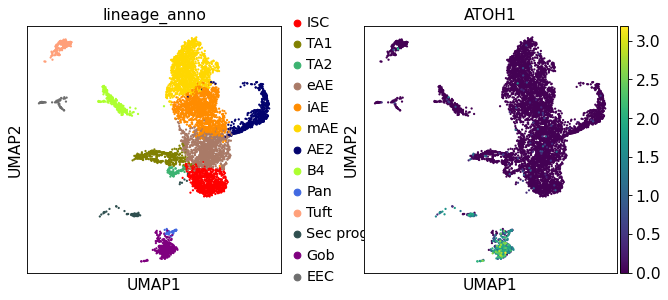

Determining highly variable genes...
Highly variable genes: 3776
Scaling data...
Computing principal components...


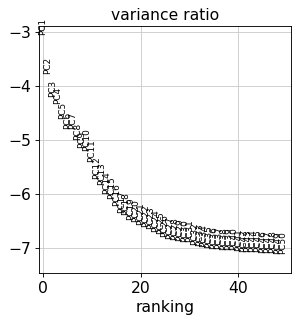

Running harmonypy integration of principal components...


2023-03-17 13:48:25,490 - harmonypy - INFO - Iteration 1 of 20
2023-03-17 13:48:26,372 - harmonypy - INFO - Iteration 2 of 20
2023-03-17 13:48:27,260 - harmonypy - INFO - Iteration 3 of 20
2023-03-17 13:48:28,147 - harmonypy - INFO - Iteration 4 of 20
2023-03-17 13:48:29,014 - harmonypy - INFO - Iteration 5 of 20
2023-03-17 13:48:29,906 - harmonypy - INFO - Converged after 5 iterations


Computing neighborhood graph...


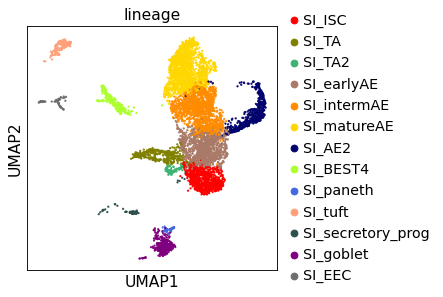

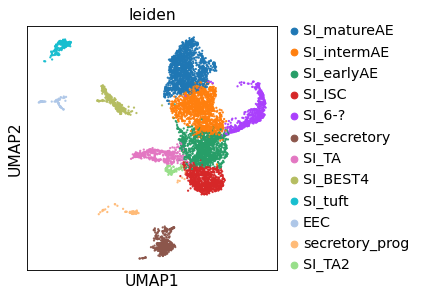

Clustering complete.

Computing principal components...


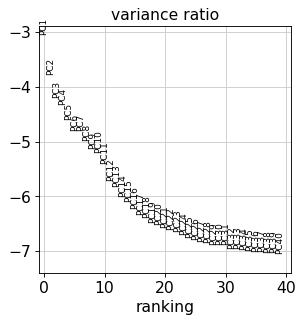

Running harmonypy integration of principal components...


2023-03-17 13:48:35,094 - harmonypy - INFO - Iteration 1 of 20
2023-03-17 13:48:35,965 - harmonypy - INFO - Iteration 2 of 20
2023-03-17 13:48:36,817 - harmonypy - INFO - Iteration 3 of 20
2023-03-17 13:48:37,752 - harmonypy - INFO - Iteration 4 of 20
2023-03-17 13:48:38,624 - harmonypy - INFO - Iteration 5 of 20
2023-03-17 13:48:39,479 - harmonypy - INFO - Converged after 5 iterations


Computing neighborhood graph...


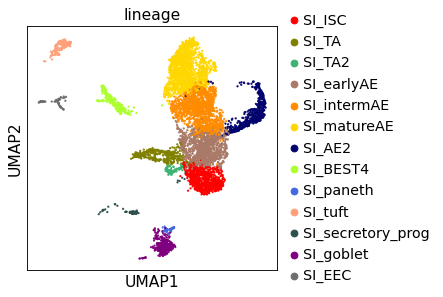

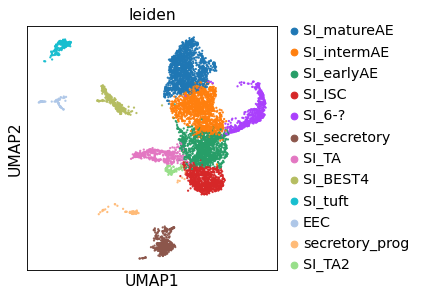

Clustering complete.



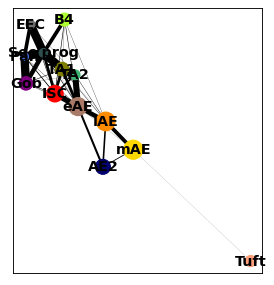

    from        to  edge_weight
0    ISC       ISC     0.000000
1    ISC       TA1     0.326079
2    ISC       TA2     0.212133
3    ISC       eAE     0.662672
4    ISC       iAE     0.010698
..   ...       ...          ...
164  EEC       Pan     0.436568
165  EEC      Tuft     0.000000
166  EEC  Sec prog     1.000000
167  EEC       Gob     0.000000
168  EEC       EEC     0.000000

[169 rows x 3 columns]
[[0.         0.32607947 0.21213285 0.66267215 0.         0.
  0.         0.         0.09901533 0.         0.33710221 0.
  0.        ]
 [0.32607947 0.         1.         0.34930725 0.         0.
  0.         0.         0.         0.         1.         0.
  0.        ]
 [0.21213285 1.         0.         0.73224776 0.         0.
  0.         0.         0.         0.         0.15716434 0.
  0.        ]
 [0.66267215 0.34930725 0.73224776 0.         0.54533219 0.
  0.24438857 0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.         0.54533219 0.        

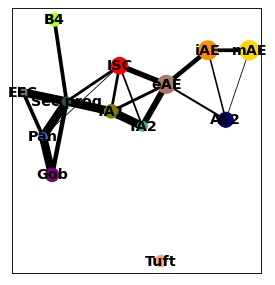

In [6]:
## ## PAGA for SI, Fig 2F
adata = mp.load(combined_path, 'clustered_annotated_adata_k25_lr0.92_v1.5.h5ad')

# print([a for a in adata.obs.lineage.unique()]) 

lineage_order = ['C_ISC','C_TA','C_earlyACC','C_lateACC','C_BEST4','C_tuft','C_secretory_prog','C_goblet',
                 'C_EEC',
                 'SI_ISC','SI_TA','SI_TA2','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2','SI_BEST4',
                 'SI_paneth','SI_tuft','SI_secretory_prog','SI_goblet','SI_EEC','SI_FAE']

# print(adata)
adata.obs.lineage.cat.reorder_categories(lineage_order, inplace=True)
adata.uns['lineage_colors'] = contrast_palette

adata.obs['lineage_anno'] = adata.obs['lineage']
adata.uns['lineage_anno_colors'] = contrast_palette

subset = adata[adata.obs.organ == 'SI']
subset = subset[~subset.obs.lineage.isin(['SI_FAE'])]
# print(subset.X.shape)

subset.obs['lineage_anno'].cat.categories = ['ISC', 'TA1', 'TA2', 'eAE', 'iAE', 'mAE', 'AE2', 'B4', 'Pan',
                                             'Tuft', 'Sec prog', 'Gob', 'EEC']

sc.pl.umap(subset, color = ['lineage_anno','ATOH1'])

##
cluster_key = 'lineage_anno'
connectivity_cutoff = 0.08

leiden_res = 0.15
num_neighbors = 20
num_pcs = 40
kwargs = {'max_iter_harmony':20}

subset = mp.pipeline.recluster(subset, expt_path=combined_path,
                               #write_file = 'SI_subset_lr0.2_nn40_pcs40.h5ad',
                               harmonize=True, recalc_leiden = False, regress_qc_params = False, 
                               recalc_hvg = True, annotate_cell_cycle = False, regress_cell_cycle = False, 
                               reembed = False, save = False, recalc_pca = True, 
                               **kwargs)

subset2 = mp.pipeline.recluster(subset, save=False, expt_path=combined_path, write_file=None, use_raw = False,
                                recalc_pca=True, recalc_leiden=False, reembed=False, recalc_hvg = False, 
                                harmonize=True,  annotate_cell_cycle=False, 
                                regress_cell_cycle=False, num_pcs=num_pcs, num_neighbors=num_neighbors,
                                leiden_res=leiden_res, rescale_data = False, **kwargs)

sc.tl.paga(subset2, groups=cluster_key)
sc.pl.paga(subset2, color = 'lineage_anno')

paga_network = pd.DataFrame(subset2.uns['paga']['connectivities'].todense(),
                       index = subset2.obs[cluster_key].cat.categories,
                       columns = subset2.obs[cluster_key].cat.categories
                      ).stack().reset_index()
paga_network.columns = ['from', 'to', 'edge_weight']

print(paga_network)

paga_network.to_csv(combined_path+'SI_paga_connectivities_v2.0.csv')

network = subset2.uns['paga']['connectivities'].todense()
network[np.where(network <= connectivity_cutoff)] = 0
print(network)

network_sparse = scipy.sparse.csr_matrix(network)

# print((network_sparse.todense() == network_sparse.todense().transpose()).all())

# ## reshape network2 to adjaceny matrix and check values 

# # network.to_csv(combined_path+'SI_paga_connectivities.csv')


subset3 = subset2.copy()
# print(subset2)
subset3.uns['paga']['connectivities'] = network_sparse
sc.pl.paga(subset3, color = 'lineage_anno')#, save = '_SI_lineages')


Reading data from /proj/magness/CDS010-014-015_combined/clustered_annotated_adata_k25_lr0.92_v1.5.h5ad

Computing principal components...


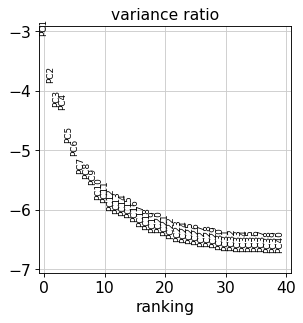

Running harmonypy integration of principal components...


2023-03-17 13:48:43,832 - harmonypy - INFO - Iteration 1 of 20
2023-03-17 13:48:44,428 - harmonypy - INFO - Iteration 2 of 20
2023-03-17 13:48:45,040 - harmonypy - INFO - Iteration 3 of 20
2023-03-17 13:48:45,642 - harmonypy - INFO - Iteration 4 of 20
2023-03-17 13:48:46,255 - harmonypy - INFO - Iteration 5 of 20
2023-03-17 13:48:46,713 - harmonypy - INFO - Iteration 6 of 20
2023-03-17 13:48:47,092 - harmonypy - INFO - Iteration 7 of 20
2023-03-17 13:48:47,462 - harmonypy - INFO - Iteration 8 of 20
2023-03-17 13:48:47,839 - harmonypy - INFO - Converged after 8 iterations


Computing neighborhood graph...
Calculating Leiden clusters...


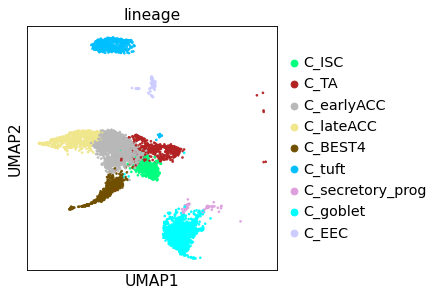

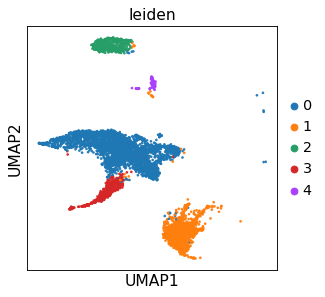

Trying to set attribute `.uns` of view, copying.


Clustering complete.



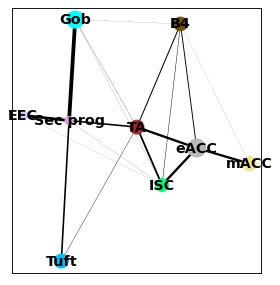

   from        to  edge_weight
0   ISC       ISC     0.000000
1   ISC        TA     0.215240
2   ISC      eACC     0.277660
3   ISC      mACC     0.005604
4   ISC        B4     0.055053
..  ...       ...          ...
76  EEC        B4     0.000000
77  EEC      Tuft     0.000000
78  EEC  Sec prog     0.336796
79  EEC       Gob     0.000000
80  EEC       EEC     0.000000

[81 rows x 3 columns]
[[0.         0.21524034 0.27765991 0.         0.         0.
  0.         0.         0.        ]
 [0.21524034 0.         0.28001878 0.         0.12286644 0.
  0.18991106 0.         0.        ]
 [0.27765991 0.28001878 0.         0.27314659 0.10917733 0.
  0.         0.         0.        ]
 [0.         0.         0.27314659 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.12286644 0.10917733 0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.19360688 0.         0.        ]
 [0.         0.18991106 0.   

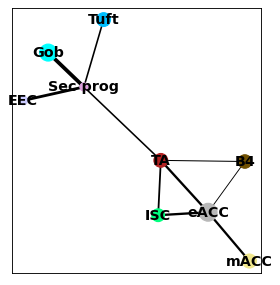

In [7]:
## PAGA for colon, Fig 2G
adata = mp.load(combined_path, 'clustered_annotated_adata_k25_lr0.92_v1.5.h5ad')

# print([a for a in adata.obs.lineage.unique()]) 

lineage_order = ['C_ISC','C_TA','C_earlyACC','C_lateACC','C_BEST4','C_tuft','C_secretory_prog','C_goblet',
                 'C_EEC',
                 'SI_ISC','SI_TA','SI_TA2','SI_earlyAE','SI_intermAE','SI_matureAE','SI_AE2','SI_BEST4',
                 'SI_paneth','SI_tuft','SI_secretory_prog','SI_goblet','SI_EEC','SI_FAE']

# print(adata)
adata.obs.lineage.cat.reorder_categories(lineage_order, inplace=True)
adata.uns['lineage_colors'] = contrast_palette

adata.obs['lineage_anno'] = adata.obs['lineage']
adata.uns['lineage_anno_colors'] = contrast_palette

subset = adata[adata.obs.organ == 'Colon']
# print(subset.X.shape)

subset.obs['lineage_anno'].cat.categories = ['ISC','TA','eACC','mACC','B4','Tuft','Sec prog',
                                             'Gob','EEC']

# sc.pl.umap(subset, color = ['lineage_anno','ATOH1'])

##
cluster_key = 'lineage_anno'
connectivity_cutoff = 0.09

leiden_res = 0.15
num_neighbors = 20
num_pcs = 40
kwargs = {'max_iter_harmony':20}

subset2 = mp.pipeline.recluster(subset, save=False, expt_path=combined_path, write_file=None, use_raw = False,
                                recalc_pca=True, reembed=False, recalc_hvg = False, 
                                harmonize=True,  annotate_cell_cycle=False, 
                                regress_cell_cycle=False, num_pcs=num_pcs, num_neighbors=num_neighbors,
                                leiden_res=leiden_res, rescale_data = False, **kwargs)

sc.tl.paga(subset, groups=cluster_key)
sc.pl.paga(subset, color = 'lineage_anno')

paga_network = pd.DataFrame(subset.uns['paga']['connectivities'].todense(),
                       index = subset.obs[cluster_key].cat.categories,
                       columns = subset.obs[cluster_key].cat.categories
                      ).stack().reset_index()
paga_network.columns = ['from', 'to', 'edge_weight']

print(paga_network)

# paga_network.to_csv(combined_path+'Colon_paga_connectivities_v2.0.csv')


network = subset.uns['paga']['connectivities'].todense()
network[np.where(network <= connectivity_cutoff)] = 0
print(network)

network_sparse = scipy.sparse.csr_matrix(network)

print((network_sparse.todense() == network_sparse.todense().transpose()).all())

subset2 = subset.copy()
# print(subset2)
subset2.uns['paga']['connectivities'] = network_sparse
sc.pl.paga(subset2, color = 'lineage_anno')#, save = '_colon_subset_paga')